# IMAGE CLASSIFICATION

### **_Author_**

    Althaaf Athaayaa Daffa Qushayyizidane

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import zipfile
import os
import wget

# # Unduh dataset rockpaperscissors
# url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
# wget.download(url, 'rockpaperscissors.zip')

# # Ekstrak dataset
# with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
#     zip_ref.extractall('rockpaperscissors')

# Definisikan path dataset
base_dir = 'C:/Users/altha/Documents/DICODING/rockpaperscissors/rockpaperscissors/rps-cv-images'


# DATA PREPROCESSING

In [2]:
# Bagi dataset menjadi train set dan validation set
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Buat ImageDataGenerator untuk augmentasi gambar dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4  # 40% dari dataset digunakan untuk validation
)

# ImageDataGenerator untuk data training
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# ImageDataGenerator untuk data validation
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# MEMBANGUN MODEL

In [3]:
# Membangun model Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


c:\Users\altha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# TRAINING MODEL

In [4]:
# Training model dengan early stopping untuk menghindari overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    callbacks=[early_stopping]
)


Epoch 1/50


c:\Users\altha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 454ms/step - accuracy: 0.3891 - loss: 1.1020 - val_accuracy: 0.4225 - val_loss: 1.0329
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 0.9915 - val_accuracy: 0.7000 - val_loss: 0.8509
Epoch 3/50


c:\Users\altha\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 407ms/step - accuracy: 0.4623 - loss: 1.0195 - val_accuracy: 0.6852 - val_loss: 0.7901
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.7264 - val_accuracy: 0.8000 - val_loss: 0.8921
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 420ms/step - accuracy: 0.7835 - loss: 0.5644 - val_accuracy: 0.9005 - val_loss: 0.3475
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.3056 - val_accuracy: 1.0000 - val_loss: 0.0534
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 406ms/step - accuracy: 0.8948 - loss: 0.2894 - val_accuracy: 0.9213 - val_loss: 0.2439
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.2057 - val_accuracy: 1.0000 - val_loss: 0.1001
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - accuracy: 0.9306 - loss: 0.2163 - val_accuracy: 0.9502 - val_loss: 0.1602
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1286 - val_accuracy: 1.0000 - val_los

# EVALUASI MODEL

In [5]:
# Evaluasi model dengan data validation
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy*100:.2f}%')


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.9595 - loss: 0.1382
Validation accuracy: 96.45%


# PELAPORAN

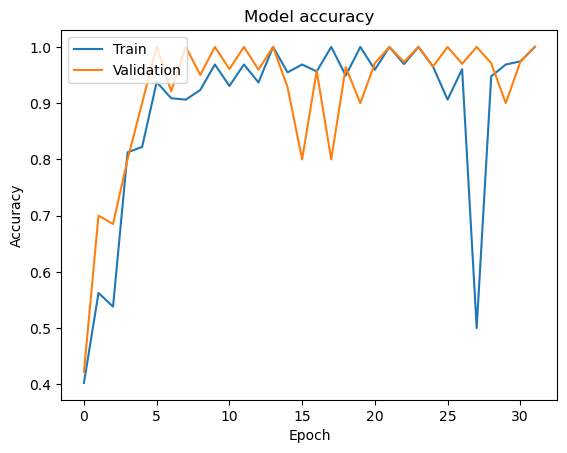

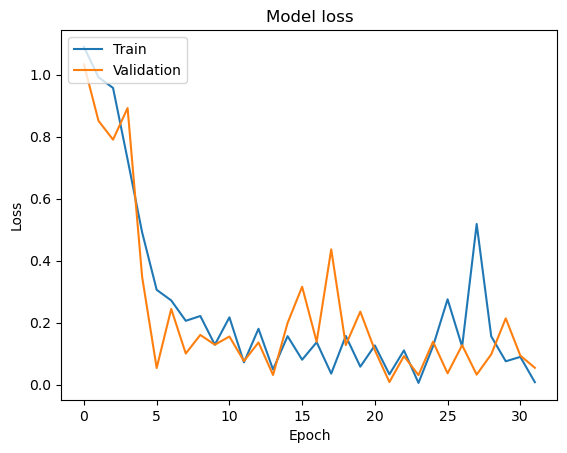

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# PREDIKSI GAMBAR BARU

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


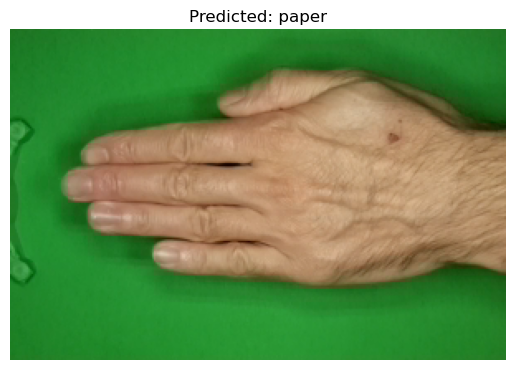

The predicted class is: paper


In [10]:
# Save the model
model.save('rock_paper_scissors_model.h5')

# Function to predict a new image
def predict_image(image_path):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    prediction = model.predict(img_array)
    class_indices = {v: k for k, v in train_generator.class_indices.items()}
    predicted_class = class_indices[np.argmax(prediction)]

    # Display the image and prediction
    plt.imshow(image.load_img(image_path))
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()
    return predicted_class

# Example usage
image_path = 'C:/Users/altha/Documents/DICODING/rockpaperscissors/rockpaperscissors/rps-cv-images/paper/0a3UtNzl5Ll3sq8K.png'
print(f'The predicted class is: {predict_image(image_path)}')


In [9]:
# Add your personal information
your_name = "Althaaf Athaayaa Daffa Qushayyizidane"
print(f'Submission by: {your_name}')


Submission by: Althaaf Athaayaa Daffa Qushayyizidane
